#### 累積分布関数 $F_X(x)$に従う確率変数 $X$ から一様分布に従う確率変数$U$ への変換
- 確率変数 $X$ を，それが従う確率分布の累積分布関数(CDF)で $U = F_X(X)$ と変換すると，
  $U$ は一様分布に従う確率変数となる
- 以下のグラフでは，2種類の確率分布（正規分布，$\chi^2$ 分布）に従う標本を，それぞれの累積分布関数
  (`norm.cdf`, `ch2_f.cdf`) で変換して，その結果のヒストグラムを一様分布の確率密度関数と比較している

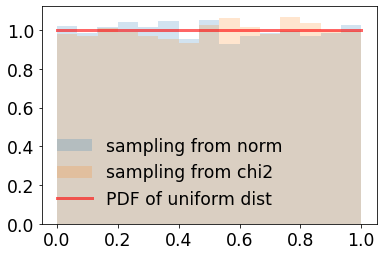

In [1]:
import numpy as np
from scipy.stats import uniform, norm, chi2
import matplotlib.pyplot as plt

n = 10000
x = norm.rvs(size=n)
u = norm.cdf(x) # 累積分布関数(cumulative distribution function)

chi2_f = chi2.freeze(df=10)
x2 = chi2_f.rvs(size=n)
u2 = chi2_f.cdf(x2) # 累積分布関数(cumulative distribution function)

v = np.linspace(0.0, 1.0, 100)
pdf_v = uniform.pdf(v)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'
plt.rcParams['legend.fontsize'] = 'xx-large'

plt.hist(u, bins=15, density=True, histtype='stepfilled', alpha=0.2, label='sampling from norm')
plt.hist(u2, bins=15, density=True, histtype='stepfilled', alpha=0.2, label='sampling from chi2')

plt.plot(v, pdf_v, 'r-', lw=3, alpha=0.6, label='PDF of uniform dist')

plt.legend(loc='best', frameon=False)
plt.savefig('change_of_rand_var.pdf', bbox_inches='tight')

##### 解説
一般に，変換$Y = g(X)$で対応づけられる確率変数$X$，$Y$が従う分布の
確率密度関数をそれぞれ，$f_X(x)$，$f_Y(y)$とすると，
両者の関係は

$$
f_Y(y) = f_X(x) \bigg/ \left|\dfrac{d g(x)}{d x}\right|
$$

となる。

したがって，$U = F_X(X)$で示される変換について，

$$
\begin{aligned}
    f_U(u) 
      = f_X(x) \bigg/ \left|\dfrac{d F_X(x)}{d x}\right|
      = f_X(x) / |f_X(x)| = 1
\end{aligned}
$$

が成立する（ $f_X(x)$ は $F_X(x)$ に対応する確率密度関数であり，$f_X(x) \geq 0$）。

一方で，累積分布関数(cumulative distribution function; CDF)の定義から 
$U = F_X(X)$ の値の範囲は $[0, 1]$ なので，
$U$ が従う確率分布が区間 $[0, 1]$ 上の一様分布であることが確かめられる。

上記の仕組みは，$F_X(x)$ が表す確率分布が正規分布でも $\chi^2$ 分布でも通用する。